Los datos son el resultado de un análisis químico de vinos cultivados en la misma región en Italia por tres cultivadores diferentes. Se toman trece medidas diferentes para los diferentes componentes que se encuentran en los tres tipos de vino.

In [1]:
#conda install scikit-learn 
#conda install -c anaconda pandas
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

## Cargar datos

Este <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html">Dataset</a> es descargado directamente de la lista de conjuntos de datos brindado por scikit-learn

In [12]:
wine = datasets.load_wine(as_frame=True, ) #Obtener en formato Frame de Pandas

## Mostrar datos

In [15]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## Mostrar clases objetivo

In [16]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

## Mostrar tabla completa

In [17]:
wine.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Crear conjuntos de entrenamiento y prueba

Para poder validar la exactitud del modelo creado es necesario separar en dos el dataset.<br/>
Una parte será utilizada para <b>entrenar el modelo</b>.<br/>
La otra parte será utilizada para <b>verificar</b> si el modelo ya entrenado está dando las salidas esperadas.

Para hacer este proceso se utiliza la función <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split </a> a la que se le pasará los siguientes parámetros.

 - Conjunto de datos del dataset
 - Conjunto de clases objetivo del dataset
 - Tamaño que tendrá el conjunto de prueba (Si es un float entre 0 y 1 representará proporción del conjunto y si es un valor int la cantidad absoluta de elementos)
 
Esta función dará como salida:

- Conjunto de datos de entrenamiento
- Conjunto de clases objetivo de entrenamiento
- Conjunto de datos de prueba
- Conjunto de clases objetivo de prueba

In [45]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

## Crear y entrenar clasificador Gaussiano

Una vez instanciado el clasificador es necesario llamar a la función fit para iniciar el entrenamiento pasándole como parámetros los conjuntos de entrenamiento creados.

In [46]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## Obtener prediciones

Para obtener predicciones se llama a la función predict de el modelo ya entrenado pasándole por parámetro el conjunto de datos de prueba.

In [47]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 1, 2, 1])

## Comprobar las predicciones

Para obtener el nivel de presición total de el modelo para todos los casos de prueba presentados se utiliza la función accuracy_score a la que se le pasa por parámetro las clases objetivos de el conjunto de entrenamiento y las predicciones resultantes del modelo de manera que puedan ser comparadas

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.9444444444444444

Otra manera de visualizar este resultado es a través de una matriz de confusión. <br>
Estas matrices tienen un tamaño de n*n donde n es la cantidad de clases existentes.<br>

In [49]:
metrics.confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 1, 23,  2],
       [ 0,  0, 17]])

Utilizando Matplotlib es posible gráficar esta matriz para que el resultado sea más claro. <br>
Es necesario pasar por parámetro el modelo, el conjunto de entrenamiento y el conjunto de prueba.

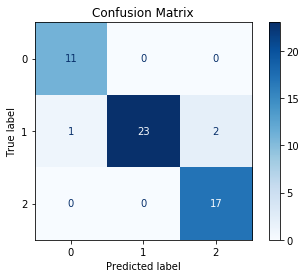

In [50]:
disp = metrics.plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()